In [31]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
data=pd.read_excel('Data/SS.xlsx')
data.head()

,SrNo,SiteFeature,AttributeOrParameter,StationOrSiteName,PeriodOrDateofMeasurment,SS,SampleSource,SampleDepth
0,126,Surface Water,SS,Ambeghar,2018-08-29 09:35:00,54,River,30.0
1,127,Surface Water,SS,Ambeghar,2018-09-19 09:30:00,50,River,30.0
2,128,Surface Water,SS,Ambeghar,2018-11-14 09:45:00,81,River,30.0
3,129,Surface Water,SS,Ambeghar,2018-12-05 09:30:00,80,River,30.0
4,130,Surface Water,SS,Ambeghar,2019-01-20 09:50:00,51,River,30.0


In [33]:
data.SiteFeature.unique()

array(['Surface Water'], dtype=object)

In [34]:
data.SampleDepth.unique()

array([30., nan])

In [35]:
data.StationOrSiteName.unique()

array(['Ambeghar', 'Chaskman', 'Dattawadi', 'Daund',
       'Khadakwasla Reservoir', 'Ambegaon', 'Khamgaon', 'Narsinhpur',
       'Nighoje', 'Panshet Reservoir', 'Paud', 'Pavana Reservoir',
       'Pimpale Gurav', 'Rakshewadi'], dtype=object)

In [36]:
data.SampleSource.unique()

array(['River', 'Reservoir'], dtype=object)

In [37]:
#dropping Features having only unique or same value
data.drop(['SrNo','AttributeOrParameter','SiteFeature','SampleDepth'],axis=1,inplace=True)

In [38]:
data.columns=['Station','Period','SS','SampleSource']

In [39]:
data.head()

,Station,Period,SS,SampleSource
0,Ambeghar,2018-08-29 09:35:00,54,River
1,Ambeghar,2018-09-19 09:30:00,50,River
2,Ambeghar,2018-11-14 09:45:00,81,River
3,Ambeghar,2018-12-05 09:30:00,80,River
4,Ambeghar,2019-01-20 09:50:00,51,River


In [40]:
data=data.sort_values(by=['Period'])
x=np.arange(916)
data.index=x

In [41]:
data.head(10)

,Station,Period,SS,SampleSource
0,Khamgaon,2011-01-06 13:00:00,38,River
1,Dattawadi,2011-01-10 11:20:00,41,River
2,Paud,2011-01-10 13:40:00,22,River
3,Daund,2011-01-12 12:10:00,29,River
4,Narsinhpur,2011-01-15 12:00:00,38,River
5,Ambeghar,2011-01-18 13:15:00,28,River
6,Chaskman,2011-01-27 14:45:00,40,River
7,Pimpale Gurav,2011-01-29 13:30:00,41,River
8,Nighoje,2011-01-29 15:20:00,35,River
9,Ambeghar,2011-02-03 12:30:00,31,River


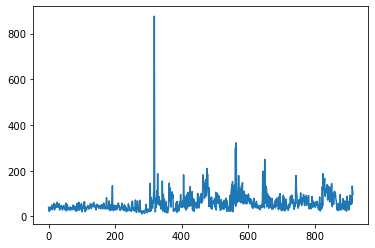

In [42]:
plt.plot(data['SS'])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Station       916 non-null    object        
 1   Period        916 non-null    datetime64[ns]
 2   SS            916 non-null    int64         
 3   SampleSource  916 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 35.8+ KB


In [44]:
data.shape

(916, 4)

In [45]:
data.Station.value_counts()

Khamgaon                 118
Khadakwasla Reservoir    117
Pavana Reservoir         115
Panshet Reservoir        115
Ambeghar                 106
Paud                      75
Chaskman                  73
Daund                     68
Ambegaon                  50
Rakshewadi                36
Narsinhpur                32
Nighoje                    5
Dattawadi                  4
Pimpale Gurav              2
Name: Station, dtype: int64

In [46]:
data.replace(['Pimpale Gurav','Dattawadi','Nighoje','Narsinhpur','Rakshewadi'], 'Others',inplace=True)

In [47]:
data.head()

,Station,Period,SS,SampleSource
0,Khamgaon,2011-01-06 13:00:00,38,River
1,Others,2011-01-10 11:20:00,41,River
2,Paud,2011-01-10 13:40:00,22,River
3,Daund,2011-01-12 12:10:00,29,River
4,Others,2011-01-15 12:00:00,38,River


In [48]:
data.Station.value_counts()

Khamgaon                 118
Khadakwasla Reservoir    117
Pavana Reservoir         115
Panshet Reservoir        115
Ambeghar                 106
Others                    79
Paud                      75
Chaskman                  73
Daund                     68
Ambegaon                  50
Name: Station, dtype: int64

In [49]:
data.SampleSource.value_counts()

River        571
Reservoir    345
Name: SampleSource, dtype: int64

In [50]:
#One hot EnSSing
data=pd.get_dummies(data,columns=['Station','SampleSource'],drop_first=True)

In [51]:
data.head()

,Period,SS,Station_Ambeghar,Station_Chaskman,Station_Daund,Station_Khadakwasla Reservoir,Station_Khamgaon,Station_Others,Station_Panshet Reservoir,Station_Paud,Station_Pavana Reservoir,SampleSource_River
0,2011-01-06 13:00:00,38,0,0,0,0,1,0,0,0,0,1
1,2011-01-10 11:20:00,41,0,0,0,0,0,1,0,0,0,1
2,2011-01-10 13:40:00,22,0,0,0,0,0,0,0,1,0,1
3,2011-01-12 12:10:00,29,0,0,1,0,0,0,0,0,0,1
4,2011-01-15 12:00:00,38,0,0,0,0,0,1,0,0,0,1


In [52]:
# Handling DateTime
data['Date']=data['Period'].dt.day
data['Month']=data['Period'].dt.month
data['Year']=data['Period'].dt.year
data.drop('Period',axis=1,inplace=True)

In [53]:
data.head()

,SS,Station_Ambeghar,Station_Chaskman,Station_Daund,Station_Khadakwasla Reservoir,Station_Khamgaon,Station_Others,Station_Panshet Reservoir,Station_Paud,Station_Pavana Reservoir,SampleSource_River,Date,Month,Year
0,38,0,0,0,0,1,0,0,0,0,1,6,1,2011
1,41,0,0,0,0,0,1,0,0,0,1,10,1,2011
2,22,0,0,0,0,0,0,0,1,0,1,10,1,2011
3,29,0,0,1,0,0,0,0,0,0,1,12,1,2011
4,38,0,0,0,0,0,1,0,0,0,1,15,1,2011


In [54]:
data.columns=['SS', 'Ambeghar', 'Chaskman', 'Daund',
       'Khadakwasla_Reservoir', 'Khamgaon', 'Others',
       'Panshet_Reservoir', 'Paud', 'Pavana_Reservoir',
       'River', 'Date', 'Month', 'Year']

In [55]:
data=data[['Date', 'Month', 'Year','Ambeghar', 'Chaskman', 'Daund',
       'Khadakwasla_Reservoir', 'Khamgaon', 'Others',
       'Panshet_Reservoir', 'Paud', 'Pavana_Reservoir',
       'River','SS']]

In [56]:
data.head()

,Date,Month,Year,Ambeghar,Chaskman,Daund,Khadakwasla_Reservoir,Khamgaon,Others,Panshet_Reservoir,Paud,Pavana_Reservoir,River,SS
0,6,1,2011,0,0,0,0,1,0,0,0,0,1,38
1,10,1,2011,0,0,0,0,0,1,0,0,0,1,41
2,10,1,2011,0,0,0,0,0,0,0,1,0,1,22
3,12,1,2011,0,0,1,0,0,0,0,0,0,1,29
4,15,1,2011,0,0,0,0,0,1,0,0,0,1,38


In [57]:
data.corr()

,Date,Month,Year,Ambeghar,Chaskman,Daund,Khadakwasla_Reservoir,Khamgaon,Others,Panshet_Reservoir,Paud,Pavana_Reservoir,River,SS
Date,1.000000,0.079456,0.039521,0.027659,0.082769,0.074858,-0.076699,0.010704,0.072433,-0.075330,-0.060839,-0.063014,0.148056,0.067883
Month,0.079456,1.000000,-0.084850,-0.070877,0.016942,0.119496,-0.015185,-0.021571,0.051393,-0.015045,-0.038182,-0.015045,0.032879,0.113667
Year,0.039521,-0.084850,1.000000,-0.009269,0.084052,-0.074914,0.015468,0.008263,-0.095444,0.008587,-0.000559,0.008587,-0.024217,0.230539
Ambeghar,0.027659,-0.070877,-0.009269,1.000000,-0.106453,-0.102439,-0.138430,-0.139107,-0.111138,-0.137070,-0.108030,-0.137070,0.281191,-0.054938
Chaskman,0.082769,0.016942,0.084052,-0.106453,1.000000,-0.083331,-0.112607,-0.113159,-0.090406,-0.111501,-0.087878,-0.111501,0.228738,0.066679
Daund,0.074858,0.119496,-0.074914,-0.102439,-0.083331,1.000000,-0.108362,-0.108892,-0.086998,-0.107297,-0.084565,-0.107297,0.220114,0.116729
Khadakwasla_Reservoir,-0.076699,-0.015185,0.015468,-0.138430,-0.112607,-0.108362,1.000000,-0.147150,-0.117563,-0.144995,-0.114275,-0.144995,-0.492298,-0.046823
Khamgaon,0.010704,-0.021571,0.008263,-0.139107,-0.113159,-0.108892,-0.147150,1.000000,-0.118138,-0.145704,-0.114834,-0.145704,0.298904,0.133033
Others,0.072433,0.051393,-0.095444,-0.111138,-0.090406,-0.086998,-0.117563,-0.118138,1.000000,-0.116408,-0.091745,-0.116408,0.238804,0.066667
Panshet_Reservoir,-0.075330,-0.015045,0.008587,-0.137070,-0.111501,-0.107297,-0.144995,-0.145704,-0.116408,1.000000,-0.113153,-0.143571,-0.480663,-0.108337


In [58]:
X=data.drop('SS',axis=1)
Y=data['SS']

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [60]:
import xgboost as xg
from sklearn.metrics import mean_squared_error,r2_score
import math

regressor = xg.XGBRegressor(n_estimators = 200, random_state = 0)
 
regressor.fit(x_train, y_train)
pred=regressor.predict(x_test)
print('RMSE : ',math.sqrt(mean_squared_error(y_test,pred)))
print('R2 : ',(r2_score(y_test,pred)*100))

RMSE :  28.336324432202783
R2 :  24.736781861694233


In [61]:
parameter=pd.read_excel('Input/Input.xlsx')
SS=regressor.predict(parameter)
SS=pd.DataFrame(SS)
SS.columns=['SS']
output=pd.concat([parameter,SS],axis=1)
output.to_csv('Output/Output_SS.csv')